In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import streamlit as st
import pandas as pd
import altair as alt

In [3]:
df = pd.read_csv("Tissue_dataset.csv")
df1 = pd.read_csv("Tissue_metadata_CP.csv")
df = df.T
df.columns = df.iloc[0]
df # Set the first row as header
df = df.drop(df.index[0])  # Remove the first row
print(df.head(15).to_string())


Gene      Bmp4_1 Cdkn3_1 Cnih1_1 Gmfb_1 Cgrrf1_1 Samd4a_1 Gch1_1 Wdhd1_1 Socs4_1 Mapk1ip1l_1 Lgals3_1 Dlgap5_1 Fbxo34_1 Atg14_1 Ktn1_1 LOC100768260_1 Tmem260_1 Otx2_1 Exoc5_1 Ap5m1_2 Naa30_1 Ccdc198_1 Slc35f4_1 LOC100772688_1 LOC100752473_1 LOC100754555_1 LOC100754268_1 LOC100752180_1 LOC100753970_1 LOC100753673_1 LOC100753077_1 LOC100751895_1 LOC100752775_1 LOC100769725_1 LOC100768878_1 LOC100768582_1 LOC100768298_1 LOC100768007_1 LOC100769441_1 LOC100769156_1 LOC100769653_1 LOC100751879_1 LOC100756567_1 LOC100752163_1 LOC100756859_1 LOC100752760_1 LOC100752456_1 Ttc5_1 Ccnb1ip1_1 Parp2_1 Tep1_1 Klhl33_1 Osgep_1 Apex1_1 Pip4p1_1 Pnp_1 Rnase10_1 Rnase9_1 Rnase11_1 Rnase12_1 LOC100758593_1 Rnase4_1 Ang_1 Rnase6_1 LOC100758879_1 Rnase1_1 Ear7_1 Ear11_1 Ear10_1 Mettl17_1 Slc39a2_1 Ndrg2_1 Tppp2_1 Rnase13_1 LOC113832204_1 Arhgef40_1 Znf219_1 Tmem253_1 LOC100752638_1 Hnrnpc_1 Rpgrip1_1 Supt16h_1 Chd8_1 Rab2b_1 Tox4_1 Mettl3_1 Sall2_1 LOC100773730_1 LOC100773439_1 LOC100757237_1 LOC100773156

In [4]:
# Rename columns in metadata
df1.rename(columns={"Cell": "group"}, inplace=True)
df.index.name = 'Gene'
df1.set_index('Gene', inplace=True)

# Remove the current index
df1.reset_index(drop=False, inplace=False)  # Removes the default index and uses the 'Gene' column as the new index
df1

,Library,group,Batch,Sample
Gene,,,,
Kidney,PAIRED,Kidney,11,Tissue
Liver,PAIRED,Liver,11,Tissue
Lung,PAIRED,Lung,11,Tissue
Spleen,PAIRED,Spleen,11,Tissue
Kidney_12,PAIRED,Kidney,12,Tissue
Liver_12,PAIRED,Liver,12,Tissue
Lung_12,PAIRED,Lung,12,Tissue
Spleen_12,PAIRED,Spleen,12,Tissue


In [5]:
df = df.dropna()

In [6]:
df.isnull().sum()

Gene
Bmp4_1            0
Cdkn3_1           0
Cnih1_1           0
Gmfb_1            0
Cgrrf1_1          0
                 ..
LOC113839146      0
LOC113839147      0
LOC103158952_1    0
LOC113839149      0
LOC113839150      0
Length: 21487, dtype: int64

In [7]:
print(df1["group"].unique())


['Kidney' 'Liver' 'Lung' 'Spleen']


In [8]:
# Differential expression analysis using pydeseq2

from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats
import pandas as pd

# Example: Load your count matrix and metadata
# df = pd.read_csv("counts.csv", index_col=0)
# df1 = pd.read_csv("metadata.csv", index_col=0)

# Check your groups (make sure 'group' exists and is correct)
print("Groups:", df1["group"].unique())

# Initialize inference engine
inference = DefaultInference(n_cpus=8)

# Create DESeq2 dataset
dds = DeseqDataSet(
    counts=df,
    metadata=df1,
    design_factors="group",
    refit_cooks=True,
    inference=inference,
)

# Run DESeq2 pipeline
dds.deseq2()

# Define your contrast: (design factor, test group, reference group)
contrast = ("group", "Lung", "Spleen")  # Example: comparing Liver vs Kidney

# Run statistical testing
stat_res = DeseqStats(dds, contrast=contrast, inference=inference)

# Summarize results
stat_res.summary()

# Optional: Export results to CSV
results_df = stat_res.results_df
results_df.to_csv("deseq5_results.csv")


Groups: ['Kidney' 'Liver' 'Lung' 'Spleen']


C:\Users\fresh\AppData\Local\Temp\ipykernel_15764\2997842991.py:19: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(
Fitting size factors...
... done in 0.03 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 5.75 seconds.

Fitting dispersion trend curve...
... done in 0.61 seconds.

Fitting MAP dispersions...
... done in 6.31 seconds.

Fitting LFCs...
... done in 5.03 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 2.47 seconds.



Log2 fold change & Wald test p-value: group Lung vs Spleen
                   baseMean  log2FoldChange     lfcSE      stat    pvalue  \
Gene                                                                        
Bmp4_1           450.670121        2.812273  0.587897  4.783615  0.000002   
Cdkn3_1          486.018118       -5.677425  1.256176 -4.519609  0.000006   
Cnih1_1          746.532091       -0.377993  0.395789 -0.955037  0.339559   
Gmfb_1          1136.700123        0.059655  0.454177  0.131348  0.895500   
Cgrrf1_1         549.954884        0.366999  0.449821  0.815878  0.414570   
...                     ...             ...       ...       ...       ...   
LOC113839146       0.000000             NaN       NaN       NaN       NaN   
LOC113839147       0.809870       -4.364107  5.185626 -0.841578  0.400024   
LOC103158952_1     0.161974       -2.080317  5.291897 -0.393114  0.694236   
LOC113839149       1.061253       -2.855117  4.716608 -0.605333  0.544958   
LOC113839150     

In [9]:
df2 = pd.read_csv("deseq5_results.csv")
print(df2.head(15).to_string())

           Gene     baseMean  log2FoldChange     lfcSE      stat        pvalue          padj
0        Bmp4_1   450.670121        2.812273  0.587897  4.783615  1.721702e-06  1.968603e-05
1       Cdkn3_1   486.018118       -5.677425  1.256176 -4.519609  6.195397e-06  6.122532e-05
2       Cnih1_1   746.532091       -0.377993  0.395789 -0.955037  3.395590e-01  5.193871e-01
3        Gmfb_1  1136.700123        0.059655  0.454177  0.131348  8.955002e-01  9.452278e-01
4      Cgrrf1_1   549.954884        0.366999  0.449821  0.815878  4.145697e-01  5.911858e-01
5      Samd4a_1   640.112066        0.991593  0.705128  1.406259  1.596473e-01  3.081424e-01
6        Gch1_1  1702.000416       -1.549263  0.520627 -2.975765  2.922588e-03  1.309451e-02
7       Wdhd1_1   219.385520       -2.985883  0.736951 -4.051673  5.085274e-05  3.939584e-04
8       Socs4_1   356.652861       -1.186678  0.610257 -1.944554  5.182863e-02  1.351559e-01
9   Mapk1ip1l_1   843.685876       -0.601722  0.311420 -1.932191  5.33

In [10]:
df2.isnull().sum()

Gene                 0
baseMean             0
log2FoldChange    2550
lfcSE             2550
stat              2550
pvalue            2550
padj              5102
dtype: int64

In [11]:
# Filter the dataframe
def filter_dataframe(df):
    # Remove rows where pvalue is None
    df_filtered = df2.dropna(subset=['pvalue'])
    
    # Remove rows where pvalue is not less than 0.05
    df_filtered = df_filtered[df_filtered['pvalue'] < 0.05]
    return df_filtered

df_temp_filtered = filter_dataframe(df)
df_temp_filtered.to_csv("result_filtered1.csv")

# Categorize genes
df2['regulation'] = np.where(df2['log2FoldChange'] > 0, 'up', 'down')

In [12]:
print(df2.head(15).to_string())

           Gene     baseMean  log2FoldChange     lfcSE      stat        pvalue          padj regulation
0        Bmp4_1   450.670121        2.812273  0.587897  4.783615  1.721702e-06  1.968603e-05         up
1       Cdkn3_1   486.018118       -5.677425  1.256176 -4.519609  6.195397e-06  6.122532e-05       down
2       Cnih1_1   746.532091       -0.377993  0.395789 -0.955037  3.395590e-01  5.193871e-01       down
3        Gmfb_1  1136.700123        0.059655  0.454177  0.131348  8.955002e-01  9.452278e-01         up
4      Cgrrf1_1   549.954884        0.366999  0.449821  0.815878  4.145697e-01  5.911858e-01         up
5      Samd4a_1   640.112066        0.991593  0.705128  1.406259  1.596473e-01  3.081424e-01         up
6        Gch1_1  1702.000416       -1.549263  0.520627 -2.975765  2.922588e-03  1.309451e-02       down
7       Wdhd1_1   219.385520       -2.985883  0.736951 -4.051673  5.085274e-05  3.939584e-04       down
8       Socs4_1   356.652861       -1.186678  0.610257 -1.944554

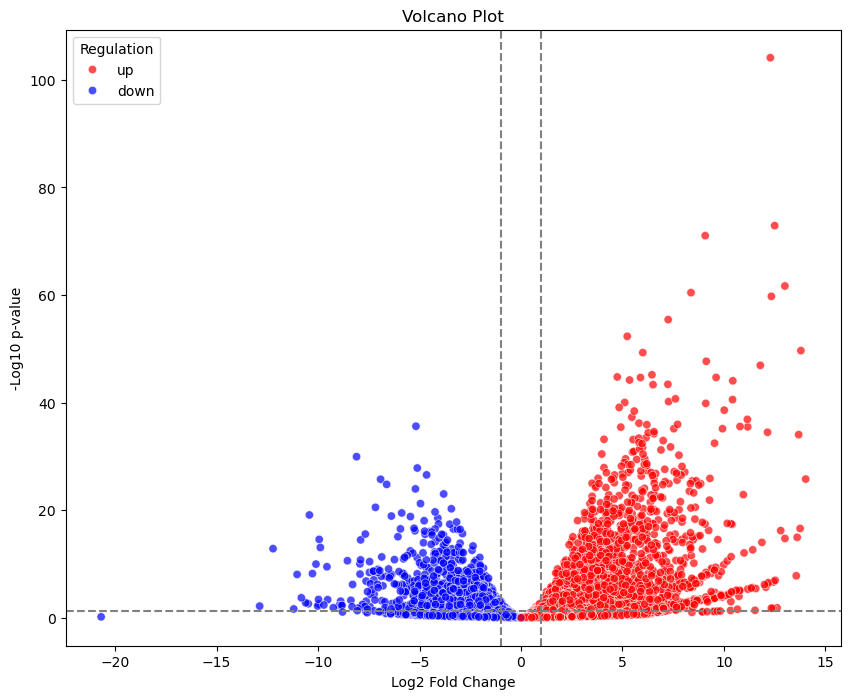

In [13]:
# Volcano plot
def volcano_plot(df):
    plt.figure(figsize=(10, 8))
    # Scatter plot of log2FoldChange vs -log10(pvalue)
    sns.scatterplot(x='log2FoldChange', y=-np.log10(df['pvalue']), data=df, hue='regulation', palette={'up': 'red', 'down': 'blue'}, alpha=0.7)
    plt.title('Volcano Plot')
    plt.xlabel('Log2 Fold Change')
    plt.ylabel('-Log10 p-value')
    plt.axhline(y=-np.log10(0.05), color='grey', linestyle='--')
    plt.axvline(x=1, color='grey', linestyle='--')
    plt.axvline(x=-1, color='grey', linestyle='--')
    plt.legend(title='Regulation')
    plt.show()

# Create the volcano plot
volcano_plot(df2)

# Save upregulated and downregulated genes
upregulated_genes = df2[df2['regulation'] == 'up']
downregulated_genes = df2[df2['regulation'] == 'down']

upregulated_genes.to_csv("upregulated_genes1.csv")
downregulated_genes.to_csv("downregulated_genes1.csv")

In [14]:
import streamlit as st
import pandas as pd
import altair as alt

st.set_page_config(page_title="Gene Expression Dashboard", layout="wide")

st.title("🧬 Gene Expression Explorer")

st.markdown("""
Upload your gene expression data and visualize expression levels across samples.
- Format: Rows = samples, Columns = genes
""")

uploaded_file = st.file_uploader("Upload your CSV file", type="csv")

if uploaded_file:
    df2 = pd.read_csv("deseq5_results.csv")

    if df2.shape[1] < 2:
        st.error("Please ensure the file contains at least one column for Sample IDs and one or more gene columns.")
    else:
        st.success("File uploaded successfully.")
        df2.columns = df2.columns.astype(str)
        st.dataframe(df2.head())

        sample_col = st.selectbox("Select sample ID column", df2.columns)
        gene_cols = [col for col in df2.columns if col != sample_col]

        gene = st.selectbox("Select a gene to visualize", gene_cols)

        chart_data = df2[[sample_col, gene]].copy()
        chart_data = chart_data.rename(columns={sample_col: "Sample", gene: "Expression"})

        st.altair_chart(
            alt.Chart(chart_data).mark_bar().encode(
                x=alt.X("Sample:N", sort=None),
                y="Expression:Q",
                tooltip=["Sample", "Expression"]
            ).properties(
                width=800,
                height=400,
                title=f"Expression Levels of {gene}"
            ),
            use_container_width=True
        )
else:
    st.info("Awaiting CSV file upload.")



2025-06-20 11:32:50.054 
  command:

    streamlit run c:\Users\fresh\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
